PROYECTO -> Encuesta de Salarios de Programación en Colombia - 2020

*   Identificar las caracteristicas de los desarrolladores.
*   Identificar la información de las empresas.


Librerias que vamos a utilizar

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sidetable as sdb

In [ ]:
#Esta libreria nos dara un panorama mejor de como se distribuyen los datos
!pip install sidetable

# Importando dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/Project/Dataset'
%ls

/content/drive/My Drive/Colab Notebooks/Project/Dataset
Fundador_pie.jpg  raw.csv  tipo_empresa_pie.jpg


In [ ]:
df = pd.read_csv('raw.csv')

# Información dataset

In [ ]:
print('Tamaño del conjunto de datos:',df.shape)

Tamaño del conjunto de datos: (1703, 45)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 45 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Timestamp                                                                                                                           1703 non-null   object 
 1   ¿Para qué tipo de empresa trabaja?                                                                                                  1703 non-null   object 
 2   La empresa para la que usted trabaja se dedica principalmente a                                                                     1703 non-null   object 
 3   ¿Cuantos años de fundada tiene la empresa para la que trabaja?                     

In [ ]:
"""
 Porcentaje general de las preguntas que fueron resueltas
 Ejemplo para la pregunta ¿Si ha estudiado en un bootcamp de programación, en cuál? (ingrese el url del bootcamp)
 el 92.2% no ha estudiado en un bootcamp

"""

sidetable = df.stb.missing(all)
sidetable


,missing,total,percent
"¿Si ha estudiado en un bootcamp de programación, en cuál? (ingrese el url del bootcamp)",1571,1703,92.248972
"¿Si tiene acciones, cuál es el precio de emisión por acción en USD? (use $3,750 como tasa de cambio si es necesario)",1508,1703,88.549618
"¿Si tiene acciones, cuántas tiene en total?",1475,1703,86.611861
¿En qué sitio web busca oportunidades laborales principalmente?,543,1703,31.884909
¿Cuál es su título en la empresa?,99,1703,5.813271
¿Cuantas horas trabaja por semana?,90,1703,5.284792
Su modo de trabajo es: (ignorando el cambio por covid-19),8,1703,0.469759
¿En cuál de los siguientes lenguajes de programación ocupa la mayoría de su tiempo laboral?,3,1703,0.176160
¿En qué otros lenguajes de programación ocupa su tiempo laboral?,3,1703,0.176160
Usted prefiere:,2,1703,0.117440


## Carateristicas de las empresas

Obtenemos en un nuevo dataFrame las cualidades de las empresas donde elaboran los desarrolladores.

In [ ]:
carasteristicas_empresa = pd.DataFrame({"Tipo empresa":df['¿Para qué tipo de empresa trabaja?'], "Rol empresa":df['La empresa para la que usted trabaja se dedica principalmente a'], "Tiempo fundada empresa":df['¿Cuantos años de fundada tiene la empresa para la que trabaja?']})

In [ ]:
carasteristicas_empresa

,Tipo empresa,Rol empresa,Tiempo fundada empresa
0,empresa Colombiana con mercado latinoamericano,servicio habilitado por tecnologia (similar a ...,menos de 1
1,empresa extranjera,servicio o producto de tecnología (similar a d...,2 - 5
2,empresa extranjera,servicio habilitado por tecnologia (similar a ...,5 - 10
3,empresa Colombiana con mercado global,"servicio no tecnológico (banca, seguros, conta...",más de 10
4,empresa Colombiana con mercado EEUU,consultoría y servicios de desarrollo de softw...,5 - 10
...,...,...,...
1698,empresa Colombiana con mercado latinoamericano,servicio habilitado por tecnologia (similar a ...,menos de 1
1699,empresa Colombiana con mercado latinoamericano,servicio habilitado por tecnologia (similar a ...,2 - 5
1700,empresa Colombiana con mercado EEUU,consultoría y servicios de desarrollo de softw...,más de 10
1701,empresa extranjera,servicio habilitado por tecnologia (similar a ...,2 - 5


### Caracteristicas de los desarrolladores.

Es importante conocer las cualidades de los desarrolladores, por ello, guardamos en un nuevo dataset todo lo relacionado con ellos, dejando aparte las cualidades de las empresas donde laboran.

In [ ]:
df = df.drop(['¿Para qué tipo de empresa trabaja?','La empresa para la que usted trabaja se dedica principalmente a','¿Cuantos años de fundada tiene la empresa para la que trabaja?'],axis=1)

In [ ]:
df.head(3)

,Timestamp,¿Cuál es su título en la empresa?,¿Se considera usted fundador en la empresa?,¿Qué porcentaje de su tiempo laboral se ocupa en tareas relacionadas a desarrollo de software?,¿Qué porcentaje de su tiempo laboral se ocupa en gerencia de proyectos?,¿Qué porcentaje de su tiempo laboral se ocupa en liderazgo técnico?,¿Qué porcentaje de su tiempo laboral se ocupa en gerencia de ingeniería?,¿Cuánto tiempo lleva en su cargo actual (incluyendo freelance)?,¿Cuántos años de experiencia en desarrollo de software profesional tiene?,¿En cuál de los siguientes lenguajes de programación ocupa la mayoría de su tiempo laboral?,¿En qué otros lenguajes de programación ocupa su tiempo laboral?,Tipo de relación laboral,Su modo de trabajo es: (ignorando el cambio por covid-19),Usted prefiere:,¿Tiene titulo universitario o técnico?,¿Estudió alguna carrera de PRE-grado relacionada a ingeniería de sistemas?,¿Estudió alguna carrera de POSTgrado relacionada a ingeniería de sistemas?,¿Tomó clases de programación o algorítmia en la universidad?,¿Cuál es su máximo titulo alcanzado (graduado)?,¿Ha estudiado en algún bootcamp de programación?,"¿Si ha estudiado en un bootcamp de programación, en cuál? (ingrese el url del bootcamp)",¿Cuál es su nivel de inglés para realizar conversaciones técnicas sobre software?,¿A usted le pagan en pesos colombianos (COP) o dólares (USD)?,"¿Usando la moneda de la respuesta anterior, cuánto es su remuneración ANUAL base? eg 36,000,000 si es pesos o 3,600 si es dólares",¿Cuánto es su remuneración ANUAL adicional (usando la moneda que respondio anteriormente)?,¿Cuánto era la remuneración base ANUAL de su trabajo/rol anterior?,¿Quién paga su seguro de salud?,¿Quién paga sus pensiones y cesantias?,¿Tiene acciones (opciones/stock options/rsus) o dividendos de su empresa como parte de su compensación?,"¿Si tiene acciones, cuántas tiene en total?","¿Si tiene acciones, cuál es el precio de emisión por acción en USD? (use $3,750 como tasa de cambio si es necesario)",¿Trabaja usted en proyectos freelance a pesar de tener trabajo tiempo completo?,¿Cuanto fue el total de sus ingresos adicionales de proyectos freelance el año pasado?,¿Siente que su salario es justo?,¿En qué sitio web busca oportunidades laborales principalmente?,¿En que ciudad de Colombia vive?,¿Cuál es su país de procedencia?,¿En qué año nació?,¿Cuantos hijos tiene?,¿Con cual pronombre prefiere que se refieran a usted?,¿Se considera usted parte de una minoría racial o étnica?,¿Cuantas horas trabaja por semana?
0,6/17/2020 16:23:44,Lider técnico,no,40 - 50%,30 - 40%,10 - 20%,no tengo responsabilidades gerenciales,menos de 1 año,3 - 5 años,JavaScript,HTML / CSS,contrato a termino indefinido,remoto (en casa o en un cafe),trabajo remoto,técnico,si,no,no,bachiller,No,NaN,intermedio (puede pasar una entrevista de prog...,pesos,32.3,0,0,mi empleador,mi empleador,no,NaN,NaN,si,1000,no,https://linkedin.com,Duitama,Colombia,1997,0,él (tradicionalmente se identifica como hombre),no,NaN
1,6/17/2020 16:27:36,Frontend software engineer,no,80 - 90%,0 - 10%,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,menos de 1 año,3 - 5 años,JavaScript,HTML / CSS,contratista internacional,remoto (en casa o en un cafe),trabajo remoto,técnico,no,no,no,bachiller,No,NaN,intermedio (puede pasar una entrevista de prog...,dólares,290000000.0,0,84000000,mi empleador,yo,si - stock options,NaN,NaN,no,0,si,https://twitter.com/,Medellín,Colombia,1993,0,él (tradicionalmente se identifica como hombre),no,NaN
2,6/17/2020 16:30:30,Full stack software developer,no,70 - 80%,0 - 10%,0 - 10%,no tengo responsabilidades gerenciales,menos de 1 año,5 - 10 años,JavaScript,HTML / CSS,contratista internacional,remoto (en casa o en un cafe),trabajo remoto,universitario,si,si,si,pregrado,No,NaN,intermedio (puede pasar una entrevista de prog...,dólares,72000.0,0,38400,yo,yo,no,NaN,NaN,no,0,si,https://colombia-dev.slack.com,Armenia,Colombia,1987,0,él (tradicionalmente se identifica

# ¿Para qué tipo de empresa trabaja?

In [ ]:
tipo_empresa_valores_unicos = carasteristicas_empresa['Tipo empresa'].unique()
tipo_empresa_counts = carasteristicas_empresa['Tipo empresa'].value_counts()

In [ ]:
df_empresa = pd.DataFrame({'Total desarrolladores':tipo_empresa_counts})
df_empresa

,Total desarrolladores
empresa extranjera,663
empresa Colombiana con mercado Colombiano,352
empresa Colombiana con mercado latinoamericano,230
empresa Colombiana con mercado global,217
empresa Colombiana con mercado EEUU,193
soy independiente (freelance),48


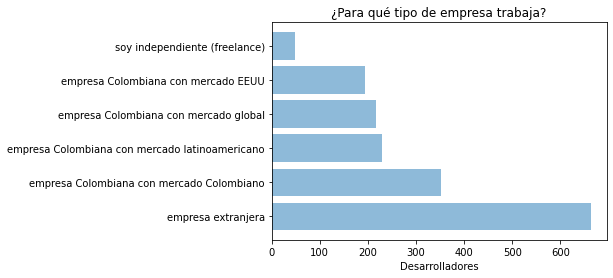

In [ ]:

plt.barh(range(6), df_empresa["Total desarrolladores"], align='center', alpha=0.5)
plt.yticks(range(6), df_empresa.index)
plt.xlabel('Desarrolladores')
#Y una etiqueta superior
plt.title('¿Para qué tipo de empresa trabaja?')
plt.savefig('tipo_empresa_barh.jpg')
plt.show()

*Graficando*

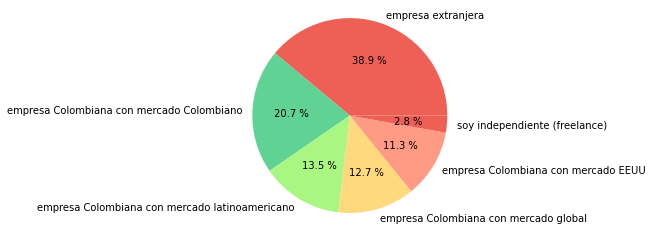

In [ ]:

colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(df_empresa["Total desarrolladores"], labels=df_empresa.index, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.savefig("tipo_empresa_pie.jpg")
plt.show()